In [5]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [74]:
def RK34step(f, told, Yold, h):
    Y1 = f(told, Yold)
    Y2 = f(told + h/2, Yold + h/2*Y1)
    Y3 = f(told + h/2, Yold + h/2*Y2)
    Z3 = f(told + h, Yold - h*Y1 + 2*h*Y2)
    Y4 = f(told + h, Yold + h*Y3)
    Ynew = Yold + h/6*(Y1 + 2*Y2 + 2*Y3 + Y4)

    err = np.abs(h/6*(2*Y2+Z3-2*Y3-Y4))
    return Ynew, err

def newstep (tol, err, errold, hold, k):
    hnew = hold * np.power(tol/max(err), 2/(3*k))*np.power(tol/max(errold), -1/(3*k))
    return hnew
    
def adaptiveRK34(f, t0, tf, y0, tol):
    k = 4
    h = (tf-t0)*np.power(tol,1/4)/(100*(1+la.norm(f(t0,y0))))
    t = [t0]
    Y = [y0]
    ERR = [np.zeros_like(y0)]
    y, err = RK34step(f, t[-1], y0, h)
    Y.append(y)
    ERR.append(err)
    h = newstep(tol, ERR[-1], np.array([tol, tol]), h, k)
    t.append(t[-1] + h)

    while t[-1] + h < tf:
        y, err = RK34step(f, t[-1], Y[-1], h)
        Y.append(y)
        ERR.append(err)
        h = newstep(tol, ERR[-1], ERR[-2], h, k)
        t.append(t[-1] + h)

    y, err = RK34step(f, t[-1], Y[-1], tf-t[-1])
    t.append(tf)
    Y.append(y)
    ERR.append(err)
    return t, Y, ERR


In [75]:
def lotka(t,u):
    a = 3
    b = 9
    c = 15
    d = 15
    return np.array([a*u[0]-b*u[0]*u[1], c*u[0]*u[1]-d*u[1]])

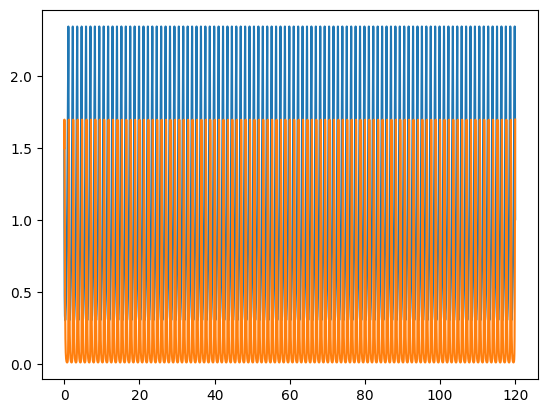

[1.5 1.5]
[0.37220524 0.08011535]
[0.38339572 0.07111585]
[0.39583147 0.06295362]
[0.40966883 0.05556921]


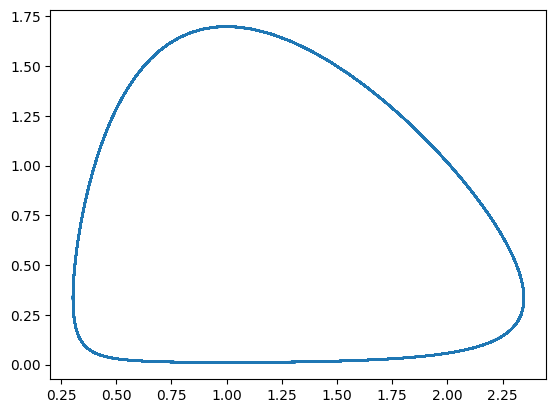

In [102]:
t, Y, ERR = adaptiveRK34(lotka, 0, 120, np.array([1.5,1.5]), 1e-6)

plt.plot(t, Y)
x = [Yx[0] for Yx in Y]
y = [Yy[1] for Yy in Y]
plt.show()
plt.plot(x,y)
print(Y[0])
print(Y[51])
print(Y[52])
print(Y[53])
print(Y[54])


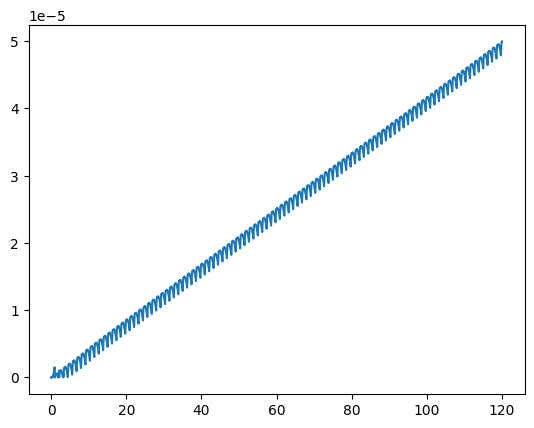

In [103]:
H = [15*n[0] + 9*n[1] - 15*np.log(n[0]) - 3*np.log(n[1]) for n in Y] 
H = np.array(H)
H = abs(H/H[0]-1)
plt.plot(t, H)